# Intelligent plotting of data with scattering

Doing scatterplots that look bad is a pretty standard feature and hard to make intelligent, but can we achieve this reasonably?

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.insert(0, "../../turbopanda/")
import turbopanda as turb

%matplotlib inline

In [2]:
print("turbopanda: %s" % turb.__version__)

turbopanda: 0.2.5


## Generating some data...

Here we will draw some samples from a multivariate normal distribution:

In [3]:
X = np.random.randn(1000,2)

## Basic plot

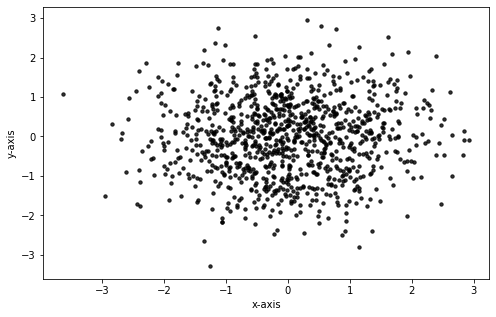

In [4]:
_ = turb.plot.scatter(X[:, 0], X[:, 1])

By default, the *size*, *colour* and *alpha* channels are pre-determined depending on how many points exist in the ecosystem.

../../turbopanda\turbopanda\plot\_scatter.py:239: UserWarning: Data input size: 100000 is large, consider setting dense=True
  warn("Data input size: {} is large, consider setting dense=True".format(X.shape[0]), UserWarning)


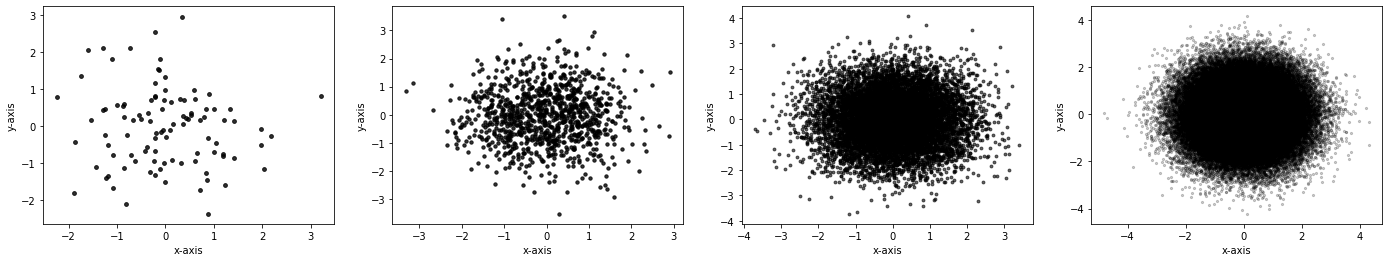

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(24,4))
for i, n in enumerate([100, 1000, 10000, 100000]):
    x = np.random.randn(n, 2)
    _ = turb.plot.scatter(x[:, 0], x[:, 1], ax=ax[i])

We see that for the $10^5$ case, there are frankly too many points to deal with, and you might have received a UserWarning informing you of this.

## Drawing points as densities

This strategy essentially involves plotting **fewer points**, but sizing each point according to how many points it represents. This is something similar to KDE estimation or contour plots, but with scatter points instead!

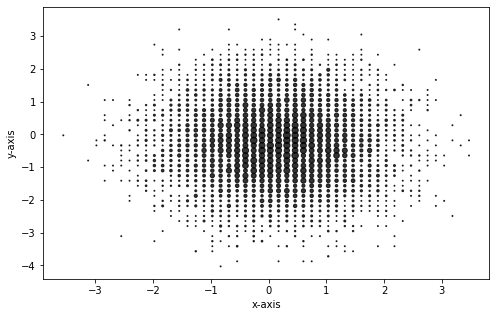

In [6]:
X2 = np.random.randn(10000,2)
_ = turb.plot.scatter(X2[:, 0], X2[:, 1], dense=True)

If you don't like the fact that every point is essentially in a uniform grid, you can add some jitter to make it look more organic:

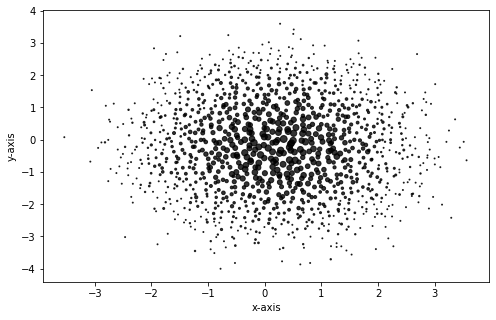

In [7]:
_ = turb.plot.scatter(X2[:, 0], X2[:, 1], dense=True, with_jitter=True)

## Line of best fit

Often we would like to quickly glance at the relationship between two variables presented. This is easily achieved with the appropriate flag:

In [8]:
from matplotlib import colors

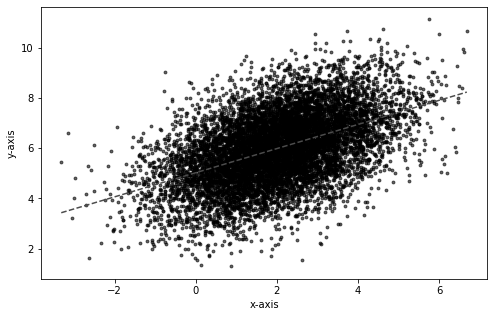

In [9]:
X3 = np.random.multivariate_normal(np.array([2., 6.]), np.array([[2., 1.], [1., 2.]]), size=10000)
_ = turb.plot.scatter(X3[:, 0], X3[:, 1], fit_line=True)

### Fitting a polynomial

The line of best fit doesn't have to be linear, a degree can be specified to establish nonlinear relationships:

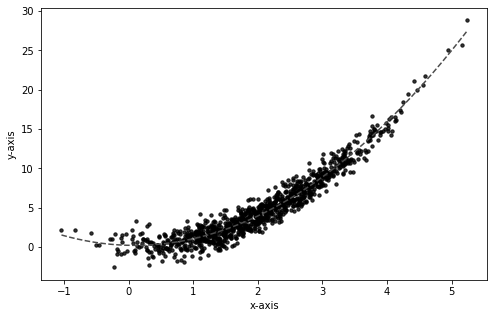

In [10]:
X4 = np.zeros((1000,2))
X4[:, 0] = np.random.normal(2., 1., size=(1000,))
X4[:, 1] = X4[:,0]**2 + np.random.randn(1000)
_ = turb.plot.scatter(X4[:, 0], X4[:, 1], fit_line=True, fit_line_degree=2)

## Automatic labelling with pandas

If you use `pd.Series` as input, the axes will automatically be labelled:

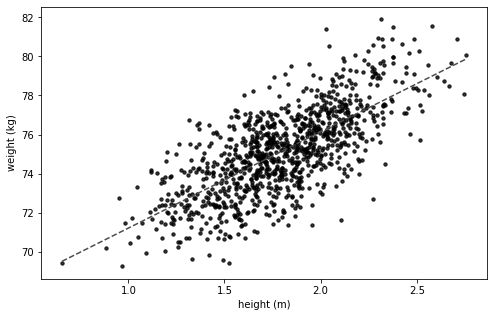

In [11]:
X5 = pd.DataFrame(
    np.random.multivariate_normal(np.array([1.77, 75.]), np.array([[.1, .5], [.5, 5.]]), size=1000), 
                  columns=['height (m)', 'weight (kg)'])

_ = turb.plot.scatter(X5['height (m)'], X5['weight (kg)'], fit_line=True)

Scaling also carries over using `x_scale` and `y_scale` option:

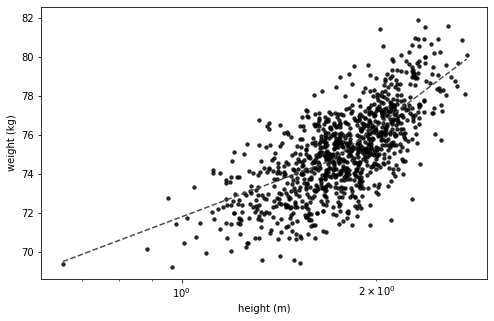

In [12]:
_ = turb.plot.scatter(X5['height (m)'], X5['weight (kg)'], x_scale="log", fit_line=True)

## Changing Colour and Markers

Specifying different colours or markers is essential for differentiating groups of points in scatterplots. 

One of the main ways is just specify a different colour or marker for all the groups.

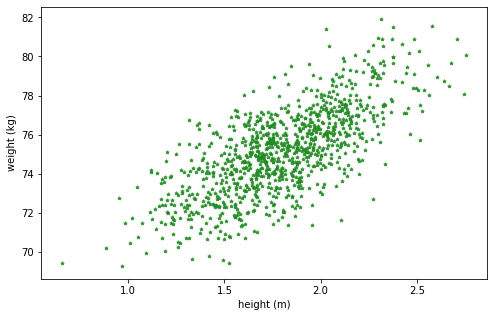

In [13]:
_ = turb.plot.scatter(X5['height (m)'], X5['weight (kg)'], marker='*', c='forestgreen')

### Color mapping

Or alternatively we can use a colormap to map a 3rd dimension on to the scatterplot. This automatically generates an appropriate colorbar, with the label if the data comes from a pandas.Series object.

The `cmap` argument is an extension which goes directly to `plt.scatter`.

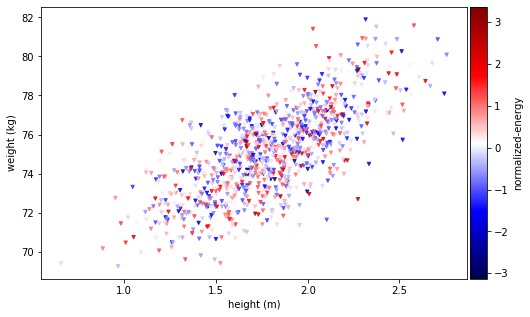

In [14]:
x5_col = pd.Series(np.random.randn(1000), name='normalized-energy')
ax = turb.plot.scatter(X5['height (m)'], X5['weight (kg)'], marker='v',
                       c=x5_col, cmap="seismic")

We can specify a categorical variable as a colour variable, and `turbopanda` will automatically map these values to a qualitative palette to display:

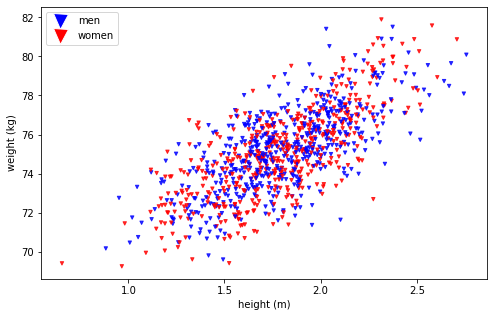

In [15]:
x5_cat = np.random.choice(["men","women"], size=(1000,))
ax = turb.plot.scatter(X5['height (m)'], X5['weight (kg)'], c=x5_cat, marker='v', cmap="hot")

We can also create a categorical by defining a boolean vector of the same length as the data whereby the true/false values
are colored differently.

Unfortunately `numpy` arrays do not convey what the selection criteria is and therefore it cannot be shown in the legend.

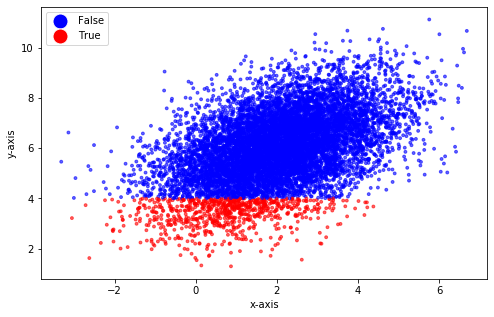

In [38]:
_ = turb.plot.scatter(X3[:, 0], X3[:, 1], c=X3[:, 1] < 4)

### Marker mapping

As with the colours, we can do similar things using the markers if categorical data needs to be presented:

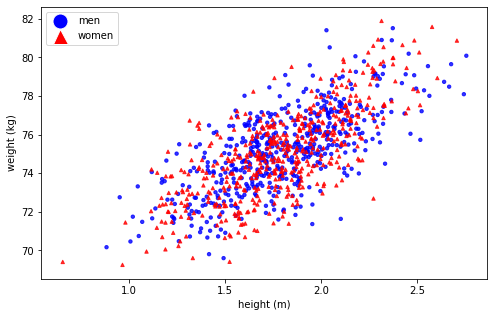

In [17]:
_ = turb.plot.scatter(X5['height (m)'], X5['weight (kg)'], marker=x5_cat, c=x5_cat)

### Grid display

We can display the grid with an optional boolean:

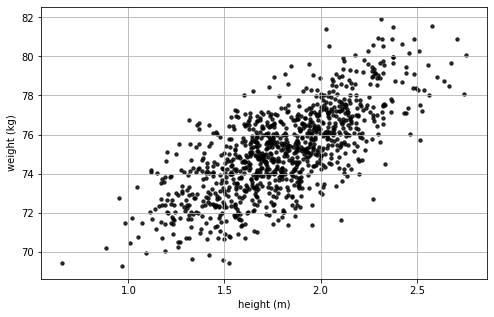

In [18]:
_ = turb.plot.scatter(X5['height (m)'], X5['weight (kg)'], with_grid=True)

## Changing the size and alpha

By default, size and alpha are optimally tuned based on the number of points you have. However they are also parameters you can set:

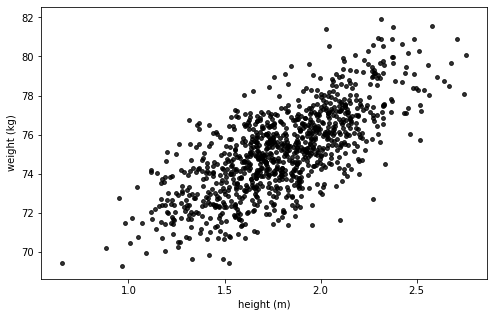

In [20]:
_ = turb.plot.scatter(X5['height (m)'], X5['weight (kg)'], s=15.)

Matplotlib allows you to set the size for every single point if an array is passed for `s`. We also display this using the colour to make it obvious the sizing of the points:

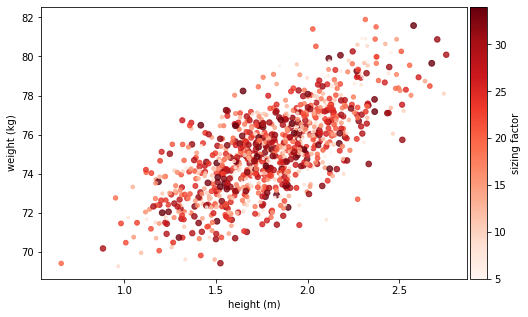

In [30]:
ns = pd.Series(np.random.randint(5, 35, size=(1000)), name="sizing factor")
_ = turb.plot.scatter(X5['height (m)'], X5['weight (kg)'], s=ns, c=ns, cmap="Reds")